In [2]:
import tensorflow as tf

# Set random seed for TensorFlow
tf.random.set_seed(404)

In [3]:
import os
import numpy as np 
import tensorflow as tf 
import keras
from keras.datasets import cifar10
from IPython.display import display
from keras.preprocessing.image import array_to_img

import matplotlib.pyplot as plt
%matplotlib inline

#Constants

In [52]:
LABEL_NAMES = ['Plane','Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse','Ship','Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS =3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS
VALIDATION_SIZE = 10000

Load the Data

In [5]:
(x_train_all,y_train_all),(x_test,y_test)=cifar10.load_data()

In [6]:
type(cifar10)
type(x_train_all)
x_train_all.shape

(50000, 32, 32, 3)

Explore the Data

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

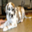

In [8]:
pic = array_to_img(x_train_all[1111])
display(pic)

In [9]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

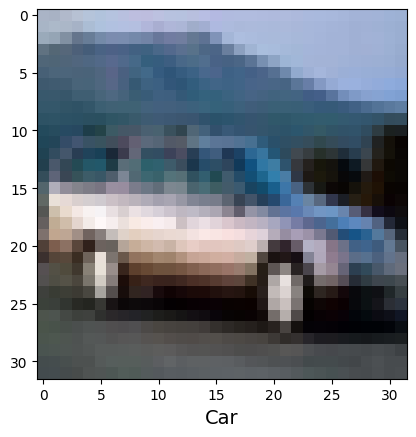

In [10]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=14)
plt.show()

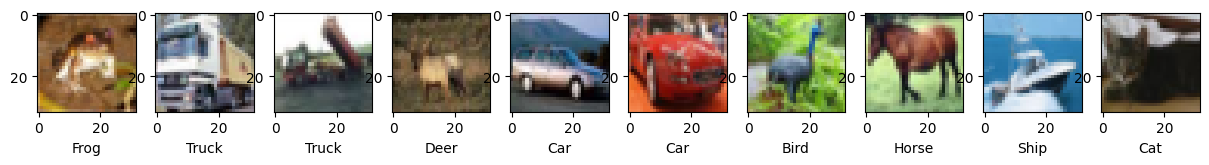

In [11]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10, i+1)
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]])
    plt.imshow(x_train_all[i])    
     
    


In [12]:
y_train_all.shape

(50000, 1)

# Preprocess Data

In [36]:
x_train_all[0][0][0][0].shape


()

In [44]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0 #To make number smaller , Scaling numbers forgradient descent

In [45]:
x_train_all[0][0][0][0]

1.8869183657477312e-13

In [46]:
x_train_all.size

153600000

In [48]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS) # To flatten the array for each row has img, pixel and channel value

In [51]:
x_train_all.shape

(50000, 3072)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)

## Create Validation Dataset

In [88]:
# Assuming x_train_all is a 1D array, you might reshape it to a 2D array
x_train_all_reshaped = x_train_all.reshape(-1, 1)

# Now you can use indexing or slicing
x_val = x_train_all_reshaped[:VALIDATION_SIZE] #10k datsets
x_val.shape


(1, 1)

In [87]:


# Now you can use indexing or slicing
x_train = x_train_all_reshaped[VALIDATION_SIZE:] # 40k datasets 
x_train.shape



(0, 1)